In [1]:
import numpy as np
import sympy as sp

In [89]:
T = 1
N = 10
D = 4
H = T/N

DIM_X = 4
DIM_U = 2
DIM = DIM_X + DIM_U

C_W = 0.01
C_A = 0.0001

WEIGHT_L = 0.01
WEIGHT_LF = 1

In [ ]:
X0 = np.array([1, 1, 3/2*np.pi, 0])

P = np.array([0.1, 0.1, 0.01, 1])
P_X, P_Y, P_THETA, P_V = P

In [5]:
U0 = sp.Array([0, 0])

In [ ]:
def F(x: "R^4 array", u: "R^2 array") -> "R^4*":
    x, y, theta, v = x
    w, a = u
    
    f = H*v
    b = f*sp.cos(w) + D - sp.sqrt(D**2 - f**2 * sp.sin(w)**2)
    
#     print("f", f,"b", b)
    x = x + b*sp.cos(theta)
    y = y + b*sp.sin(theta)
    theta = theta + sp.asin(sp.sin(w) * f/D)
    v = v + H*a
    
    return sp.Matrix([x, y, theta, v])

In [24]:
X = sp.symbols('x y theta v')

In [27]:
U = sp.symbols('w a')

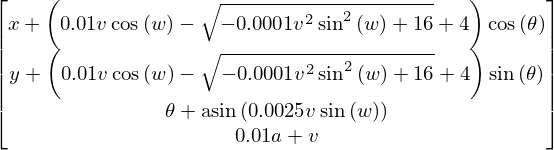

In [70]:
F(X,U)

In [29]:
X + U

(x, y, theta, v, w, a)

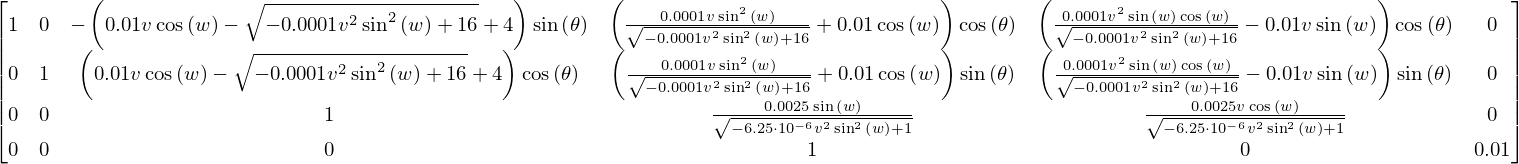

In [49]:
sp.Matrix(F(X,U)).jacobian(X+U)

In [93]:
sp.init_printing()

In [85]:
sp.init_printing(pretty_print=False)

In [36]:
d = sp.lambdify(X+U, sp.derive_by_array(F(X, U), X+U), 'numpy')

Important:

In [79]:
d = sp.lambdify(X+U, F(X,U).jacobian(X+U), 'numpy')

In [52]:
d

<function _lambdifygenerated(x, y, theta, v, w, a)>

In [80]:
d(1,1,1,1,1,1)

array([[ 1.        ,  0.        , -0.00455393,  0.00292883, -0.00454035,
         0.        ],
       [ 0.        ,  1.        ,  0.00292405,  0.00456138, -0.00707117,
         0.        ],
       [ 0.        ,  0.        ,  1.        ,  0.00210368,  0.00135076,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.01      ]])

In [58]:
d(*X0,1,1)

array([[ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -9.92519234e-19, -0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  1.00000000e+00, -0.00000000e+00,
        -5.40302306e-03, -0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         2.10367746e-03,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00,  0.00000000e+00,  1.00000000e-02]])

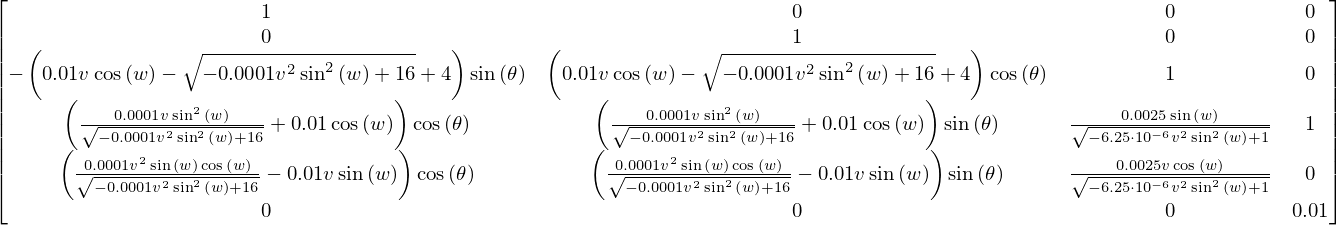

In [33]:
sp.derive_by_array(F(X, U), X+U)

In [8]:
sp.arcsin

AttributeError: module 'sympy' has no attribute 'arcsin'

In [ ]:
def z(x, p):
    return sp.sqrt(x**2 + p**2) - p

In [ ]:
def L(x, u):
    x, y, theta, v = x
    w, a = u
    return WEIGHT_L *(z(x, P_X) + z(y, P_Y)) + C_W * w**2 + C_A * a**2

In [64]:
L(X,U)

In [ ]:
def Lf(x):
    x, y, theta, v = x
    return WEIGHT_LF * (z(x, P_X) + z(y, P_Y) + z(theta, P_THETA) + z(v, P_V))

In [67]:
Lf(X)

In [71]:
?sp.symbols

In [90]:
U = tuple(sp.symbols("u{}^(:2)".format(i)) for i in range(N-1))

In [ ]:
U

In [87]:
U[0]

(u0^0, u0^1)

In [91]:
def J(U):
    def J_iter(U):
        x = X0
        yield L(x, U[0]) #L(x0, u0)
        for i in range(N-2): #L(x1, u1) ~ L(x_n-2, u_n-2)
            x = F(x, U[i])
            yield L(x, U[i+1])
        x = F(x, U[N-2]) #Lf(x_N-1)
        yield Lf(x) 
    return sum(J_iter(U))

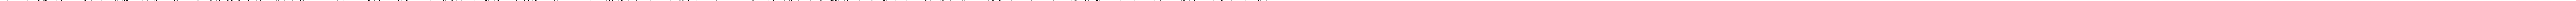

In [94]:
J(U)

In [ ]:
sp.derive_by_array(J(U), U)

In [ ]:
d = sp.lambdify(X+U, F(X,U).jacobian(X+U), 'numpy')

In [6]:
sp.init_printing()

In [3]:
x, u = sp.symbols("x u")

In [4]:
F = sp.Function("F")

In [7]:
L = sp.Function("L")

In [11]:
sp.diff(F,x)

ValueError: 
Since there are no variables in the expression F, it cannot be
differentiated.